In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Import the data
file_path = Path("Resources/myopia.csv")

df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
# Drop Target
df2 = df.drop("MYOPIC", axis=1)
df2

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
# Standardize dataset
df_scaled = StandardScaler().fit_transform(df)
print(df_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415   2.57480672]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415  -0.38837867]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897 -0.38837867]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415   2.57480672]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897 -0.38837867]]


In [5]:
# Perform dimensionality reduction with PCA. 
pca = PCA(n_components=.9)
df_pca = pca.fit_transform(df_scaled)
df_pca_df = pd.DataFrame(data = df_pca)
df_pca_df

# How did the number of the features change?
# ** NUMBER OF FEATURES REDUCED FROM 14 TO 10 **


,0,1,2,3,4,5,6,7,8,9,10
0,0.782270,0.899383,-2.697392,0.533307,-3.138869,-1.514275,2.665827,-0.685834,1.259007,0.256176,1.837348
1,-0.618300,-1.586214,-0.635506,-0.310405,0.562274,0.589375,0.675577,0.329263,-0.816743,0.683726,-0.386646
2,-0.986590,-0.653197,1.410335,0.671055,-0.100877,0.014845,-0.535527,0.124015,0.826729,-0.091503,0.370604
3,0.351714,0.943830,-2.517241,-1.389667,-2.240394,0.125941,0.395271,-1.507727,1.722338,0.097634,-0.416667
4,-0.401488,-2.792502,0.639103,0.680018,0.235568,-0.868260,0.320928,-1.447538,-0.335757,-0.383506,0.317567
...,...,...,...,...,...,...,...,...,...,...,...
613,-0.001405,0.907642,-2.346239,1.062685,2.246584,-0.473569,-0.800659,0.711374,0.809448,-0.921241,0.264993
614,-0.646011,-1.797854,-0.397228,0.149875,0.326612,0.521456,0.377034,0.183911,-0.943828,0.891717,-0.006020
615,-0.913375,-2.262451,0.699241,-0.267697,0.334606,0.713550,0.702710,-0.357955,-1.385478,0.818801,0.197022
616,-1.161025,0.466183,0.336590,0.620981,-0.279144,-0.516132,0.001183,0.536952,1.530951,0.018101,-1.091853


In [6]:
# How much data is preserved
pca.explained_variance_ratio_.sum()

0.9289880687733465

In [7]:
# Further reduce the dataset dimensions with t-SNE.
df3 = df.drop('MYOPIC', axis=1)
labels = df['MYOPIC']

In [8]:
tsne = TSNE(learning_rate=35)

In [9]:
tsne_features = tsne.fit_transform(df3)

/Users/JAS/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [10]:
tsne_features.shape

(618, 2)

In [11]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?
df3['x'] = tsne_features[:,0]
df3['y'] = tsne_features[:,1]

<function matplotlib.pyplot.show(close=None, block=None)>

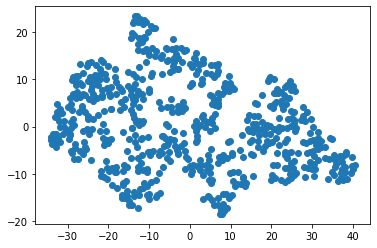

In [12]:
plt.scatter(df3['x'], df3['y'])
plt.show

In [13]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

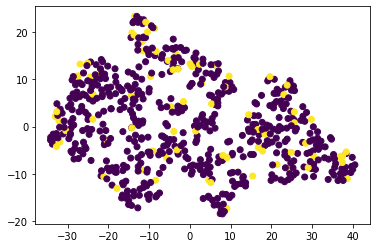

In [15]:
plt.scatter(df3['x'], df3['y'], c=labels)
plt.show()

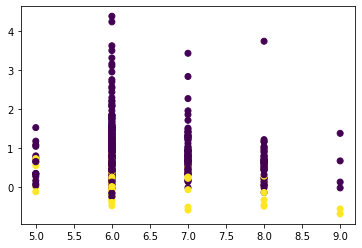

In [16]:
plt.scatter(df['AGE'], df['SPHEQ'], c=labels)
plt.show()

In [ ]:
# Create an elbow plot to identify the best number of clusters. Make sure to do the following:
# Use a for loop to determine the inertia for each k between 1 through 10.
# If possible, determine where the elbow of the plot is, and at which value of k it appears.
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca_df)
    inertia.append(km.inertia_)

In [ ]:
elbow_data ={'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show

In [ ]:
# recommendation:
# Can the patients be clustered? If so, into how many clusters?

# ** I RECOMMEND CLUSTERING INTO 4 CLUSTERS BASED ON THE GRAPH ABOVE **